<a href="https://colab.research.google.com/github/dineshbabuvaddineni/Deep_Learning/blob/main/CNN_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# python code for unzipping the data file
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/dogs-vs-cats.zip", "r")
zip_ref.extractall("/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network")
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [3]:
#Internally it is using generator concept which is there in python.
#what is generator?
#Generator is used to use memory in efficient way
#To load data in to the the memory not directly.
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/dogs_vs_cats/train",
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/test",
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# Min -Max Scaler - converts between 0 -1

def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds=validation_ds.map(process)

In [5]:
model=Sequential()

In [6]:
#first convolution
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")))

#Third convolution
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")))

#convert the data in 1D array
model.add(Flatten())

#addingfirst hidden layer with 128 neurons and relu activation function
model.add(Dense(128,activation='relu'))

#addingfirst second hidden layer with 64 neurons and relu activation function
model.add(Dense(64, activation='relu'))

#Here we have a 1 output since it is a binary classification.
model.add(Dense(1,activation='sigmoid'))



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 252s 207ms/step - loss: 0.6442 - accuracy: 0.6232 - val_loss: 0.6020 - val_accuracy: 0.7050
Epoch 2/5
625/625 [==============================] - 111s 175ms/step - loss: 0.5184 - accuracy: 0.7408 - val_loss: 0.4662 - val_accuracy: 0.7814
Epoch 3/5
625/625 [==============================] - 111s 176ms/step - loss: 0.3944 - accuracy: 0.8190 - val_loss: 0.4831 - val_accuracy: 0.7898
Epoch 4/5
625/625 [==============================] - 112s 178ms/step - loss: 0.2650 - accuracy: 0.8849 - val_loss: 0.6637 - val_accuracy: 0.7772
Epoch 5/5
625/625 [==============================] - 113s 180ms/step - loss: 0.1341 - accuracy: 0.9498 - val_loss: 0.7800 - val_accuracy: 0.7884


In [10]:
import matplotlib.pyplot as plt

In [15]:
dog_image=plt.imread("/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/Cat or Dog_1.jpg") # it only read jpg images.

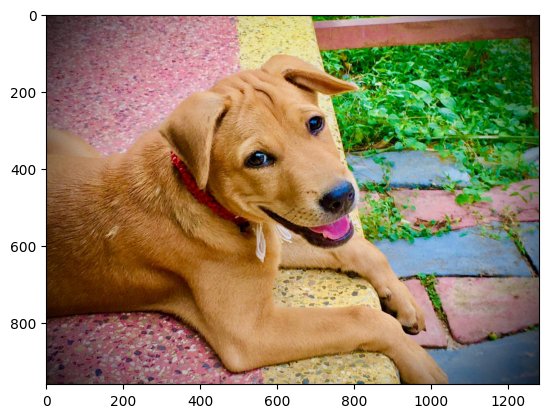

In [16]:
plt.imshow(dog_image)

In [36]:
cat_image=plt.imread("/content/drive/MyDrive/Deep Learning Ineuron/Convolution Neural Network/Cat or Dog_2.jpg")

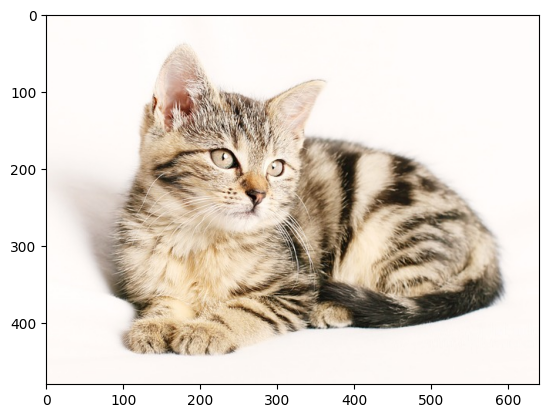

In [37]:
plt.imshow(cat_image)

In [38]:
dog_image.shape

(960, 1280, 3)

In [39]:
cat_image.shape

(480, 640, 3)

In [40]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [41]:
dog_resize.shape

(256, 256, 3)

In [42]:
cat_resize.shape

(256, 256, 3)

In [43]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [44]:
dog_resize.shape

(1, 256, 256, 3)

In [45]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [46]:
cat_resize.shape

(1, 256, 256, 3)

In [49]:
pred1=model.predict(dog_resize)

1/1 [==============================] - 0s 18ms/step


In [51]:
pred1

array([[1.]], dtype=float32)

In [50]:
pred2=model.predict(cat_resize)

1/1 [==============================] - 0s 20ms/step


In [52]:
pred2

array([[0.]], dtype=float32)

In [53]:
if pred1==0:
  print("this is image of a cat")
else:
  print("This is a image of dog")

This is a image of dog
